#**Efficiency of Neural Network Layers.**

>Below is an illustration of the different techniques that can be applied to neural network layers to improve its performance/efficiency.

>For this illustration, i will be using Customer Churn in banking. 

>>I've also performed end-end data science pipeline for this very case which includes: feature engineering, visualization, and prediction using the various machine learning techniques. The code for this can be viewed using this link (https://nbviewer.jupyter.org/github/MartinMwiti/Customer-Churn/blob/master/Customer_Churn.ipynb)  

#**Customer churn**

Customers churn when they terminate services with a company. In the context of Banking, customers churn occurs when they stop using the services provided by the bank. Reasons for churn:


*   They simply no longer use their services
*   They go to Bank's competitors


##**Part 1 - Data Preprocessing**

###Importing libraries

In [0]:
%matplotlib inline
import pandas as pd #data manipulation
import numpy as np #linear algebra
import matplotlib.pyplot as plt #visualization

from sklearn.model_selection import GridSearchCV #hyperparameter optimization

#deep learning libraries
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential 
from keras.layers import Dense,Activation, Embedding,Flatten,LeakyReLU,Dropout, BatchNormalization
from keras.activations import relu, sigmoid

###Importing the dataset

In [0]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Churn_Modelling.csv')

##**Part 2 - Predictive Modeling using Artificial Neural Network (ANN).**

In [0]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [0]:
geography = pd.get_dummies(X["Geography"], drop_first = True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [0]:
# Concatenate the Data Frames
X=pd.concat([X,geography,gender],axis=1)

In [0]:
# Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Techniques that i will use to improve efficiency of this ANN will include:


1.   Hyperparameter tuning
2.   Using Dense Layer
3.   Using Dropout


>**NB:** This is not a full list of all the options that can be exploited. All these will work but it's computationally expensive.

Key Point.

*   **Dense Layer** is fully connected neural network layer 
*   **Dropout** is similar to dense layer except that when the layer is used, the activations are set to zero for some random nodes. This is a way to prevent overfitting.

*   **Batch normalization** is a technique for improving the speed, performance, and stability of artificial neural networks. It is used to normalize the input layer by adjusting and scaling the activations.



In [12]:
#find the dimension of the independent variables for use in the input layer for the ANN
X_train.shape

(8000, 11)

####Hyperparameter tuning - Finding optimal parameters

In [20]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0: #for the first layer
            model.add(Dense(nodes, input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))

    model.add(Dense(units = 1, kernel_initializer = 'glorot_uniform',activation='sigmoid',input_dim = 11))

    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    return model

model = KerasClassifier(build_fn = create_model, verbose=0)

layers = [[20], [40,20], [45, 30, 15]] #these numbers are just arbitrary
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size=[128, 256],epochs=[10])
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

grid_result = grid.fit(X_train, y_train)

print(grid_result.best_score_, grid_result.best_params_)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








0.830125 {'activation': 'relu', 'batch_size': 128, 'epochs': 10, 'layers': [45, 30, 15]}


In [26]:
print(layers[0])

[20]


In [0]:
# Predicting the Test set results
y_pred = grid.predict(X_test)
y_pred = (y_pred > 0.5)

In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1537,   58],
       [ 251,  154]])

In [23]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print('The score accuracy is: %0.2f%%' %(score*100))

The score accuracy is: 84.55%


### Initialising the ANN

In [0]:
classifier = Sequential()

###Method 1: Applying Dense Layer

In [0]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units= 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))
#classifier.add(Dropout(0.3))

In [0]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
#classifier.add(Dropout(0.4))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [0]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 10)




Train on 5359 samples, validate on 2641 samples
Epoch 1/10





5359/5359 [==============================] - 8s 1ms/step - loss: 0.9096 - acc: 0.5165 - val_loss: 0.6279 - val_acc: 0.7153
Epoch 2/10
5359/5359 [==============================] - 3s 539us/step - loss: 0.5784 - acc: 0.7822 - val_loss: 0.5487 - val_acc: 0.7955
Epoch 3/10
5359/5359 [==============================] - 3s 522us/step - loss: 0.5287 - acc: 0.7992 - val_loss: 0.5150 - val_acc: 0.7982
Epoch 4/10
5359/5359 [==============================] - 3s 512us/step - loss: 0.4944 - acc: 0.8087 - val_loss: 0.4813 - val_acc: 0.8156
Epoch 5/10
5359/5359 [==============================] - 3s 520us/step - loss: 0.4587 - acc: 0.8242 - val_loss: 0.4539 - val_acc: 0.8232
Epoch 6/10
5359/5359 [==============================] - 3s 519us/step - loss: 0.4329 - acc: 0.8334 - val_loss: 0.4344 - val_acc: 0.8330
Epoch 7/10
5359/5359 [==============================] - 3s 517us/step - loss: 0.4124 - acc: 0.8414 - val_loss: 0.4174 - val_acc: 0

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


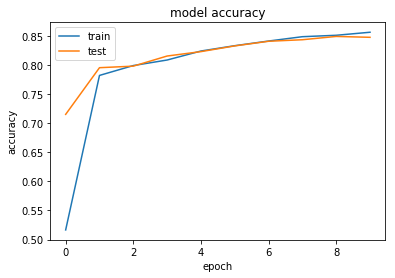

In [0]:
# list all data in history
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

>From the above graph, test and training accuracy are closely to identical, this is a good sign that the model is not overfitting.

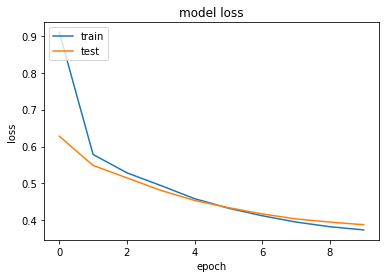

In [0]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###**Part 3 - Making the predictions and evaluating the model**

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1555,   40],
       [ 231,  174]])

In [0]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print('The score accuracy is: %0.2f%%' %(score*100))

The score accuracy is: 86.45%


###Method 2: Applying 'Drop-out' to our ANN model

In [0]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units= 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))
classifier.add(Dropout(0.3))

In [0]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dropout(0.4))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [0]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [30]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 10)

Train on 5359 samples, validate on 2641 samples
Epoch 1/10
5359/5359 [==============================] - 12s 2ms/step - loss: 0.8890 - acc: 0.5971 - val_loss: 0.5281 - val_acc: 0.7933
Epoch 2/10
5359/5359 [==============================] - 4s 715us/step - loss: 0.5662 - acc: 0.7664 - val_loss: 0.5003 - val_acc: 0.7959
Epoch 3/10
5359/5359 [==============================] - 4s 713us/step - loss: 0.5277 - acc: 0.7893 - val_loss: 0.4900 - val_acc: 0.7959
Epoch 4/10
5359/5359 [==============================] - 4s 715us/step - loss: 0.5097 - acc: 0.7949 - val_loss: 0.4839 - val_acc: 0.7955
Epoch 5/10
5359/5359 [==============================] - 4s 712us/step - loss: 0.4953 - acc: 0.7977 - val_loss: 0.4770 - val_acc: 0.7959
Epoch 6/10
5359/5359 [==============================] - 4s 720us/step - loss: 0.4910 - acc: 0.7951 - val_loss: 0.4708 - val_acc: 0.7967
Epoch 7/10
5359/5359 [==============================] - 4s 711us/step - loss: 0.4801 - acc: 0.7964 - val_loss: 0.4620 - val_acc: 0.7978
E

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


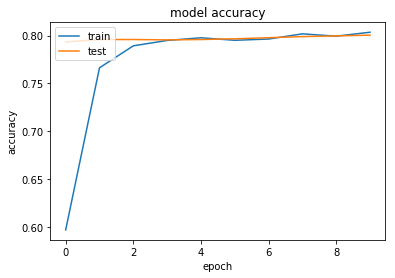

In [31]:
# list all data in history
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

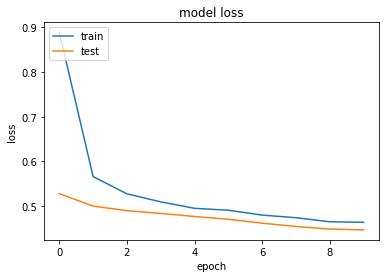

In [32]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###**Part 3 - Making the predictions and evaluating the model**

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1588,    7],
       [ 394,   11]])

In [35]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print('The score accuracy is: %0.2f%%' %(score*100))

The score accuracy is: 79.95%


> **Note:** We can see that by adding Dropout layers, the accuracy of our model has decreased. This could attributed to the fact that our model which has Dense layers without dropout was not overfitting, thus adding Dropout layer reduced the amount of features our model was learning from at each iteration.

**Conclusions:** 
1. If our model is overfitting(This can be detected if the test accuracy is significantly less than our train accuracy for each epoch), addition of a dropout layer will make our neural network layers more efficient. If on the other hand our model is not overfitting, adding dropout layer will make it perform less optimally.

2. Appying hyperparameter tuning may not always produce the best parameters in cases where the fed parameters are chosen randomly from a pool of infinite values, i.e number which can range from 0 to infinite. in our case, using 1 input layer, 1 hidden layer of 6 nodes produced better performance compared to the 3 hidden layers our GridSearch suggested.